In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){ $('div.input').hide(); } else { $('div.input').show(); } code_show = !code_show } 
$( document ).ready(code_toggle);
</script>

Raw code hidden. To show code, click <a href="javascript:code_toggle()">here</a>. <b>To begin the notebook, click Kernel then click Restart & Run All. </b> ''')

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

In [2]:
%matplotlib notebook
%run -i ./python_scripts/modules.py
%run -i ./python_scripts/colours.py
%run -i ./python_scripts/atomic_rectangle.py
%run -i ./python_scripts/atomic_triangle.py
%run -i ./python_scripts/atomic_chevron.py
%run -i ./python_scripts/operations.py
%run -i ./python_scripts/plotting.py

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

<center><h1>Atomic Motifs</h1></center>
    
#### Authors: Howell Tan, Jenifer Pham & Laura Gutierrez Funderburk, Cedric Chauve
#### Contact: [Dr. Cedric Chauve](https://cchauve.github.io) and [Dr. Veselin Jungic](http://people.math.sfu.ca/~vjungic/)
#### This is joint collaboration with Tla'amin Nation members: Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters.
#### Acknowledgements:
We thank the Tla'amin Nation and members Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters for sharing their knowledge and wisdom on the craft of traditional basket weaving. Without their openness this project would have not taken place. We also acknowledge that this work was conducted in unceded territory of the Musqueam , Skxwú7mesh, Tsleil-Waututh, Kwikwetlem nations. We thank PIMS and Cybera, as well as the Government of Canada for providing financial support and infrastructure.
#### Last modified: October 26, 2018

## Baskets Motifs & Mathematics

Woven baskets are three dimensional (3D) objects onto which two dimensional (2D) geometric figures (called **motifs** or **patterns**) are represented and often repeated with some kind of symmetry. The present notebook is focusing on the patterns observed on the baskets shown in the figure below, that were presented to us during a visit to the [Tla'amin nation](http://www.tlaaminnation.com) in May 2018. These two baskets are composed of a circular basket containing  a single repeated pattern and a rectangular basket with 4 faces, representing two patterns.

<p align='center'>Circular Basket: Triangular Motif</p>   |  <p align='center'> Rectangular Basket: Rectangular and Triangular Motifs </h3></p>
:-------------------------:|:-------------------------:
![CB](./images/20180509_150932.jpg)|![RB](./images/20180509_150313.jpg)|

###### Tla'amin Nation Baskets. Photographs by Alex Sutcliffe, IT Coordinator, TLA'AMIN NATION. 



Unlike usual geometric figures, motifs observed on baskets are not composed of pure lines and points, but of an *assemblage* of rectangular units (that we call *blocks* from now) resulting of the process of weaving lanes obtained from cedar bark or root. Moreover, these motifs are *colored* leading to an additional important feature/dimension to their modeling.

Our approach toward providing a tool that allows to explore the design of woven basket patterns is to *reduce* the notion of motif to a sequence of *geometric operations* applied successively to an initial *simple shape*, both these operations and initial shape being defined by very few mathematical parameters.

We insist on the fact that abstracting motifs to a few mathematical parameters is reducing, as, by taking away the actual human aspects of making a basket it results in extremely regular motifs that do not reflect the visual beauty and complexity of the patterns observed on real baskets. On the other hand, the ability to work with a few parameters allows to integrate them into computer programs, such as the one hidden in this notebook. 

## The Geometric Operations

We present now the various geometric operations that we can apply to a given motif in order to create a more complex motif. There are three such operations: *flip*, *reflection* and *stacking*.

### Flip
To *flip* a motif means to take the motif's *mirror image*. That is, if we were to hold a mirror above, below, or to the side of a motif, then the figure we see through the mirror is the flipped motif. By holding the mirror above or below the motif we would obtain a motif that has been *flipped horizontally.* Holding the mirror to the sides of the motif results in a motif that has been *flipped vertically.* Note that the mirror would have been held horizontally and vertically respectively.

The image below shows an example of horizontal and vertical flipping.

<center> <img src="./images/flip-operation.png" alt="Flip Operation" width = 65%>' </center>

### Reflection

To *reflect* a motif is to take the motif itself along with its mirror image. Similar to flipping a motif, we can *reflect horizontally* by placing a mirror above or below the motif and we can *reflect vertically* by placing the mirror to the left or to the right side of a motif. We see that horizontal reflections are symmetrical about a horizontal line and vertical reflections are symmetrical about a vertical line.

With reflections, we have the option to control the spacing between the motifs. We define a spacing equal to -1 as overlapping while a spacing equal to 0 results in the motifs being side by side with no space in between. Note that we set the space before any reflecting occurs and as a result (and with exception to a spacing equal to -1), the amount of spacing displayed between the motifs is doubled the amount of spacing that was set.

The image below shows an example of horizontal and vertical reflecting. The motif reflected horizontally is reflected below and the motif reflected vertically is reflected right.

<center> <img src="./images/reflect-operation.png" alt="Reflect Operation" width = 65%>' </center>

### Stacking

To *stack* a motif is to duplicate the motif and move the duplicate away from the initial motif. So, to *stack horizontally* is to duplicate the motif and fully move the duplicate to the right of the initial motif. To *stack vertically* is to duplicate the motif and fully move the duplicate directly above the initial motif. Note that moving the duplicate directly below or to the left of the initial motif will obtain the same results. To *stack diagonally* is duplicate the motif and move the duplicate directly above the initial motif then to the left or to the right of the motif.

Similar to reflecting, we have the option to control the spacing between the motifs. Unlike reflecting, the option to overlap is unavailable and the amount of spacing we set is exactly the amount of spacing that appears in the figure. 

The image below shows the three ways to stack a motif along with the area defined as spacing. The motif stacked diagonally is stacked diagonally to the right.

<center> <img src="./images/stack-operation.png" alt="Stack Operation" width = 100%>' </center>

## An interactive tool to design basket motifs

We introduce below a first draft of an interactive tool aimed at designing motifs observed on baskets. the general principle is simple: a motif is obtained from a simple starting shape, that can be defined with few parameters, that is duplicated using mathematical operators involving vertical and horizontal symmetry. 

This principle can be developed further,but in this first draft, we apply it to the motifs observed in the two baskets shown above, as an illustration of its potential.

With the tool below, we start by choosing a given initial shape, either among a set of three possible ones, each with some associated parameters, or by uploading an already saved motif. Then we can apply successively the operators described above to generate a complex motif.

In [4]:
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
        return len(self.items)

In [5]:
def toggle_button_run_cell(change):
    # Run next 6 cells once new toggle button is clicked to display appropriate pictures and widgets
    value = change['new']
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+7)'))

In [6]:
def save_as(ev):
    save_as_button.close()
    display(file_name, save_button)

def save_pattern(ev):
    save_button.close()

    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    # Remove checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    if atomic_built == True:

        # Check if file name is taken    
        if (file_name.value in pattern_files):
            display( Markdown("The file <b>" +  file_name.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name.value + '</b>, delete the file and save again.') )

        # Write editted pattern into text file
        elif (file_name.value != ''):
            file = open("./patterns/" + file_name.value, "w")

            file.write(atomic)
            file.close()

            display(Markdown("Your pattern has been saved as <b>" + file_name.value + "</b>."))


In [7]:
def new_motif(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+2)'))
    
    global atomic, atomic_built
    
    # Check if restart button was clicked
    if (restart_bool == True):
        atomic_built == False
        
    else:
        atomic_built = True 
        
    # Set atomic and close appropriate widgets 
    if (current_motif == 'Broken Line'):
        atomic = build_atomic_rect(rect_h1.value, rect_h2.value, rect_width.value, num_colors.value)
        rect_h1.close()
        rect_h2.close()
        rect_width.close()
          
    elif (current_motif == 'Triangle'):
        atomic = build_atomic_tri(tri_height.value, num_colors.value)
        tri_height.close()
        
    elif (current_motif == 'Diagonal Lines'):
        atomic = build_atomic_chevron(chevron_height.value, num_colors.value)
        chevron_height.close()
        
    num_colors.close()    
    plot_motif_2D(atomic, ori_p)
    
def upload_motif(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+2)'))
    
    global atomic, atomic_built  
    
    # Check if restart button was clicked
    if (restart_bool == True):
        atomic_built == False
        
    else:
        atomic_built = True 
    
    loaded_pattern = open('./patterns/'+ pattern_choices.value, 'r') 
    atomic = loaded_pattern.read()
        
       
    plot_motif_2D(atomic, ori_p)
    
def apply_flip(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index()+2)'))
    
    # Record flipped pattern and display operation
    atomic_f = flip(atomic, flip_choices.value)
    plot_motif_2D(atomic_f, ori_p)
    
    global op_bool, new_pattern
    op_bool = True
    new_pattern = atomic_f 
    
    # Empty backout stack since redo's are no longer possible
    while not backup.isEmpty():
        backup.pop()
       
    
def apply_reflect_h(ev):

    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index()+2)'))
    
    # Record reflected pattern and display operation
    atomic_h = reflect_h(atomic, spacing_reflect.value, choices_h.value)
    plot_motif_2D(atomic_h, ori_p)
    
    global op_bool, new_pattern
    op_bool = True
    new_pattern = atomic_h 
    
    # Empty backout stack since redo's are no longer possible    
    while not backup.isEmpty():
        backup.pop()

def apply_reflect_v(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index()+2)'))
    
    # Record reflected pattern and display operation
    atomic_v = reflect_v(atomic, spacing_reflect.value, choices_v.value)
    plot_motif_2D(atomic_v, ori_p)
    
    global op_bool, new_pattern
    op_bool = True
    new_pattern = atomic_v
    
    # Empty backout stack since redo's are no longer possible   
    while not backup.isEmpty():
        backup.pop()
        
def apply_stack_h(ev):

    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index()+2)'))
    
    # Record stacked pattern and display operation
    atomic_h = stack_h(atomic, spacing_stack.value)
    plot_motif_2D(atomic_h, ori_p)
    
    global op_bool, new_pattern
    op_bool = True
    new_pattern = atomic_h 
    
    # Empty backout stack since redo's are no longer possible 
    while not backup.isEmpty():
        backup.pop()

def apply_stack_v(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index()+2)'))
    
    # Record stacked pattern and display operation
    atomic_v = stack_v(atomic, spacing_stack.value)
    plot_motif_2D(atomic_v, ori_p)
    
    global op_bool, new_pattern
    op_bool = True
    new_pattern = atomic_v
    
    # Empty backout stack since redo's are no longer possible
    while not backup.isEmpty():
        backup.pop()
        
def apply_stack_d(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1,IPython.notebook.get_selected_index()+2)'))
    
    # Record stacked pattern and display operation
    atomic_d = stack_d(atomic, spacing_stack.value, choices_d.value)
    plot_motif_2D(atomic_d, ori_p)
    
    global op_bool, new_pattern
    op_bool = True
    new_pattern = atomic_d
    
    # Empty backout stack since redo's are no longer possible    
    while not backup.isEmpty():
        backup.pop()
        
def restart(ev):
    global atomic_built, restart_bool, op_bool
    atomic_built = False
    op_bool = False
    restart_bool = True
    restart_button.close()
    undo_button.close()
    redo_button.close()
    
    # Empty main and backout stack since undos and redos are no longer possible
    while not main.isEmpty():
        main.pop()
        
    while not backup.isEmpty():
        backup.pop()
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-3,IPython.notebook.get_selected_index()+1)'))

In [8]:
def undo_pattern(ev):
    global atomic
    top = main.peek()
    main.pop()
    backup.push(top)
    atomic = main.peek()
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+2)'))
    plot_motif_2D(atomic, ori_p)
    
def redo_pattern(ev):
    global atomic
    top = backup.peek()
    backup.pop()
    main.push(top)
    atomic = main.peek()
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(),IPython.notebook.get_selected_index()+2)'))
    plot_motif_2D(atomic, ori_p)

In [9]:
motif_options = widgets.ToggleButtons(
    button_style = 'info',
    options=['Broken Line', 'Triangle', 'Diagonal Lines', 'Upload Pattern'],
    description='',
    disabled=False,
    layout = Layout(display='flex',
                    align_items='stretch',
                    justify_content = 'center'))

display(motif_options)
motif_options.observe(toggle_button_run_cell, 'value')

ToggleButtons(button_style='info', layout=Layout(align_items='stretch', display='flex', justify_content='cente…

<IPython.core.display.Javascript object>

In [23]:
current_motif = motif_options.value

# Display appropriate heading and image
if (current_motif == 'Broken Line'):
    display(Markdown('<center> <img src="./images/atomic-rect.png" alt="Atomic Rectangle">'))
    display(Markdown("<h2> Broken Line Motif </h2>"))
    
elif (current_motif == 'Triangle'):
    display(Markdown('<center> <img src="./images/atomic-tri.png" alt="Atomic Triangle">'))
    display(Markdown("<h2> Triangular Motif </h2>"))
    
elif (current_motif == 'Diagonal Lines'):
    display(Markdown('<center> <img src="./images/atomic-chevron.png" alt="Atomic Chevron">'))
    display(Markdown("<h2> Diagonal Lines Motif </h2>"))


In [24]:
# Create Stacks used to record edits

main = Stack()
backup = Stack()

In [25]:
# Create General Sliders

style = {'description_width': 'initial'}
num_colors = widgets.IntSlider(value = 3, min = 1, max = 5, description = "Number of Colors", style = style)
num_colors.style.handle_color = '#47b0cb'
# palette = widgets.Dropdown(options={'Original':ori_p,'Seafoam Green' : pal_a, 'Magenta to blue' : pal_b, 'Ocean Breeze' : pal_c,
#              'Fiery Red' : pal_d, 'Fiery Red 2' : pal_j, 'Blue' : pal_e, 'Turquoise' : pal_f,
#             'Red to Purple': pal_g, 'Purple to Pink' : pal_h, 'Burnt Orange' : pal_i, 
#              'Forest Green' : pal_k, 'Bold Lavender' : pal_l, 'Valentine Red' : pal_m}, value = ori_p,
#     description='Palette:',
#     disabled = False,)

# Create Sliders for Parameters for Rectangle

rect_h1 = widgets.IntSlider(value = 2, min = 1, max = 10, description = "Height 1", style = style, )
rect_h1.style.handle_color = '#47b0cb'
rect_h2 = widgets.IntSlider(value = 2, min = 1, max = 10, description = "Height 2", style = style)
rect_h2.style.handle_color = '#47b0cb'
rect_width = widgets.IntSlider(value = 5, min = 0, max = 20, description = "Width", style = style)
rect_width.style.handle_color = '#47b0cb'

# Create Sliders for Parameters for Triangle

tri_height = widgets.IntSlider(value = 5, min = 3, max = 10, description = "Height", style = style)
tri_height.style.handle_color = '#47b0cb'

# Create Sliders for Parameters for Chevron
chevron_height = widgets.IntSlider(value = 5, min = 3, max = 10, description = "Height", style = style)
chevron_height.style.handle_color = '#47b0cb'

# Create folder name patterns in pattern folder does not exist
if not os.path.exists('patterns'):
    os.makedirs('patterns')

# List Pattern Text Files
pattern_files = os.listdir("./patterns/")

if '.ipynb_checkpoints' in pattern_files:
    pattern_files.remove('.ipynb_checkpoints')
    
pattern_choices = widgets.Dropdown(options = pattern_files, description ='Pattern:', style = style, disabled=False,)

In [26]:
global counter_0, atomic_built, current_pattern, op_bool, restart_bool
atomic_built = False
h_bool = False
v_bool = False
op_bool = False
restart_bool = False
counter_0 = 0

# Display Sliders for Parameters

if (current_motif == 'Broken Line'):
    display(rect_h1, rect_h2, rect_width, num_colors)

elif (current_motif == 'Triangle'):
    display(tri_height, num_colors)
    
elif (current_motif == 'Diagonal Lines'):
    display(chevron_height, num_colors)

elif (current_motif == 'Upload Pattern'):
    display(pattern_choices)

Dropdown(description='Pattern:', options=('Cross', 'Expanded Triangle', 'Square Rectangle', 'Diamond', 'tile',…

In [37]:
# Create atomic piece

global atomic

if (current_motif == 'Broken Line'):
    atomic = build_atomic_rect(rect_h1.value, rect_h2.value, rect_width.value, num_colors.value)
    
    # Create Motif Button
    motif_button = widgets.Button( button_style= 'info', description="Display Motif" );
    motif_button.on_click(new_motif)

    # Check if atomic piece has been built. If not, display button to plot atomic piece
    if atomic_built == False:
        display(motif_button)
    
elif (current_motif == 'Triangle'):
    atomic = build_atomic_tri(tri_height.value, num_colors.value)
    
    # Create Motif Button
    motif_button = widgets.Button( button_style= 'info', description="Display Motif" );
    motif_button.on_click(new_motif)

    # Check if atomic piece has been built. If not, display button to plot atomic piece
    if atomic_built == False:
        display(motif_button)
    
elif (current_motif == 'Diagonal Lines'):
    atomic = build_atomic_chevron(chevron_height.value, num_colors.value)
    
    # Create Motif Button
    motif_button = widgets.Button( button_style= 'info', description="Display Motif" );
    motif_button.on_click(new_motif)

    # Check if atomic piece has been built. If not, display button to plot atomic piece
    if atomic_built == False:
        display(motif_button)
    
elif (current_motif == 'Upload Pattern'):
    loaded_pattern = open('./patterns/'+ pattern_choices.value, 'r') 
    atomic = loaded_pattern.read()
    
    # Create Motif Button
    motif_button = widgets.Button( button_style= 'info', description="Display Motif" );
    motif_button.on_click(upload_motif)

    # Check if atomic piece has been built. If not, display button to plot atomic piece
    if atomic_built == False:
        display(motif_button)
    


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


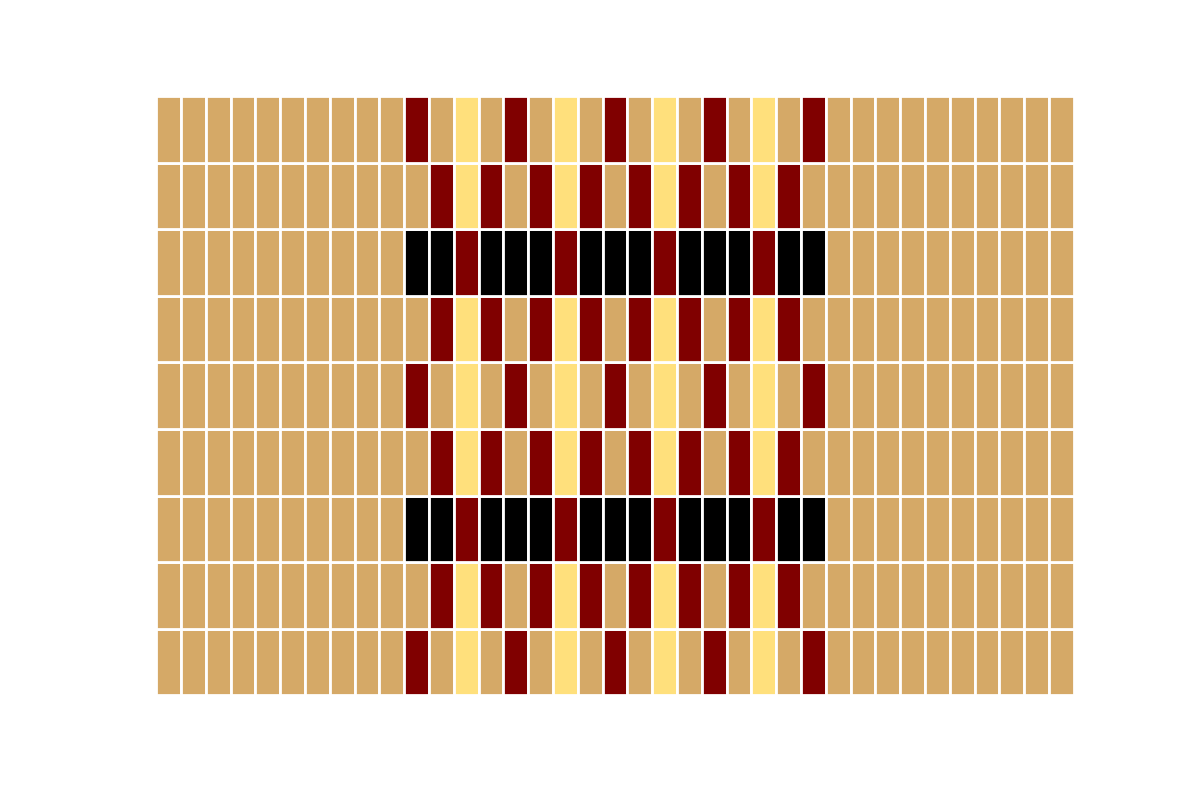

Box(children=(Button(button_style='warning', description='Undo', style=ButtonStyle()),), layout=Layout(align_i…

Accordion(children=(HBox(children=(RadioButtons(layout=Layout(align_items='center', display='flex', flex_flow=…

Text(value='', description='File Name:', placeholder='')

Button(button_style='info', description='Save', style=ButtonStyle())

Your pattern has been saved as <b>Cross22</b>.

In [38]:
#print(atomic)

# Define Layout
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='50%', justify_content = 'center')

# Restart Button
restart_button = widgets.Button( button_style= 'info', description="Restart")

# Create Saving Tools
save_button = widgets.Button(button_style= 'info',description="Save")
save_button.on_click(save_pattern)

save_as_button = widgets.Button(button_style= 'info',description="Save As")
save_as_button.on_click(save_as)

file_name = widgets.Text(placeholder = '', description='File Name:', disabled=False)

# Create Buttons for Flipping
flip_choices = widgets.RadioButtons(options=['Flip Horizontally', 'Flip Vertically'], layout = box_layout, disabled=False)
apply_flip_button = widgets.Button( button_style= 'info',description="Apply")
flip_box = HBox(children= [flip_choices, apply_flip_button], layout = box_layout)

# Create Buttons and Sliders for Reflecting
spacing_reflect = widgets.IntSlider(value = -1, min = -1, max = 10, description = "Spacing Amount", style = style)
spacing_reflect.style.handle_color = '#47b0cb'

apply_spacing_h_button = widgets.Button( button_style= 'info',description="Apply")
apply_spacing_v_button = widgets.Button( button_style= 'info',description="Apply")

choices_h = widgets.RadioButtons(options=['Reflect Above', 'Reflect Below'], layout = box_layout, disabled=False)
choices_v = widgets.RadioButtons(options=['Reflect Left', 'Reflect Right'], layout = box_layout,disabled=False)

spacing_h_box = HBox(children = [spacing_reflect, apply_spacing_h_button], layout=box_layout)
spacing_v_box = HBox(children = [spacing_reflect, apply_spacing_v_button], layout=box_layout)

# Create Buttons and Sliders for Stacking
apply_stacking_h_button = widgets.Button( button_style= 'info',description="Apply")
apply_stacking_v_button = widgets.Button( button_style= 'info',description="Apply")
apply_stacking_d_button = widgets.Button( button_style= 'info',description="Apply")

choices_d = widgets.RadioButtons(options=['Stack Left', 'Stack Right'], layout = box_layout,disabled=False)
spacing_stack = widgets.IntSlider(value = 0, min = 0, max = 10, description = "Spacing Amount", style = style)

stacking_h_box = HBox(children = [spacing_stack, apply_stacking_h_button], layout=box_layout)
stacking_v_box = HBox(children = [spacing_stack, apply_stacking_v_button], layout=box_layout)
stacking_d_box = HBox(children = [spacing_stack, apply_stacking_d_button], layout=box_layout)

# Create Accordian for Operations
reflection_options = widgets.Accordion(children = [flip_box, VBox([choices_h, spacing_h_box]), VBox([choices_v, spacing_v_box]), 
                                       VBox([stacking_h_box]), VBox([stacking_v_box]), VBox([choices_d, stacking_d_box])],  style = style)
reflection_options.selected_index = None # Collaspe accordian
reflection_options.set_title(0, 'Flip')
reflection_options.set_title(1, 'Reflect Horizontally')
reflection_options.set_title(2, 'Reflect Vertically')
reflection_options.set_title(3, 'Stack Horizontally')
reflection_options.set_title(4, 'Stack Vertically')
reflection_options.set_title(5, 'Stack Diagonally')

# Define on_click events
apply_flip_button.on_click(apply_flip)
apply_spacing_h_button.on_click(apply_reflect_h)
apply_spacing_v_button.on_click(apply_reflect_v)
apply_stacking_h_button.on_click(apply_stack_h)
apply_stacking_v_button.on_click(apply_stack_v)
apply_stacking_d_button.on_click(apply_stack_d)
restart_button.on_click(restart)

# Create Buttons for Editing
undo_button = widgets.Button( button_style= 'warning',description="Undo")
redo_button = widgets.Button( button_style= 'warning',description="Redo")

undo_button.on_click(undo_pattern)
redo_button.on_click(redo_pattern)
edit_buttons = [undo_button, redo_button]

edit_box = Box(children= edit_buttons, layout=box_layout)

# Check if new atomic was created
if atomic_built == True and op_bool == False:
    if main.isEmpty():
        main.push(atomic)
        motif_button.close()
    
    # User had clicked undo
    if backup.size() >= 1:
        
        # Main stack only has original atomic but reflections have been applied -- undo option has been exhausted
        if main.size() == 1:
            display(Box(children = [redo_button], layout=box_layout))
        
        # Undo and redo option available
        elif main.size() >= 2:
            display(edit_box)
    
    # User has applied operations to original motif
    elif main.size() >= 2:
        display(Box(children = [undo_button], layout=box_layout))

    display(reflection_options)
    display(VBox([save_as_button, restart_button]))

# Check if operation has been applied
# If so, add the current pattern onto main stack
if op_bool == True:
    atomic = new_pattern
    main.push(atomic)
    op_bool = False
    
    # User has not clicked undo
    if backup.isEmpty():
        display(Box(children = [undo_button], layout=box_layout))
        
    display(reflection_options)
    display(VBox([save_as_button, restart_button]))




In [39]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
            
                jupyter.actions.call('jupyter-notebook:save-notebook');
                
            });
        }
    );
</script>

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)